# Data Prep

Objective:
- Filter out nan values
- Get insight from the data
- Extract features

In [1]:
import pandas as pd

df = pd.read_csv('dataset/TrainingAnnotation.csv')
df = df.dropna()

# Remove unused data
df = df.drop(columns=['PED'], axis=1)
df.head(5)

,patient ID,gender,age,diagnosis,preVA,anti-VEGF,preCST,preIRF,preSRF,prePED,preHRF,VA,continue injection,CST,IRF,SRF,HRF
2,0000-0673L,2,67,2,2.00,1,373.0,0.0,1.0,1.0,0.0,2.0,1.0,381.0,0.0,1.0,1.0
3,0000-1315L,2,76,6,0.30,0,227.0,0.0,0.0,0.0,0.0,0.4,0.0,237.0,0.0,0.0,0.0
4,0000-0656L,1,64,2,0.32,1,201.0,0.0,1.0,1.0,0.0,0.4,1.0,191.0,0.0,0.0,0.0
5,0000-0656R,1,64,2,0.30,0,282.0,0.0,0.0,0.0,0.0,0.1,0.0,202.0,0.0,0.0,0.0
6,0000-1792L,2,52,6,0.12,0,198.0,0.0,1.0,0.0,0.0,0.5,0.0,230.0,0.0,0.0,0.0


Check which output column has discrete value

In [30]:
print('VA', df.VA.unique(), f'\nTotal: {len(df.VA.unique())}')
print('continue injection', df['continue injection'].unique())
print('CST', df.CST.unique(), f'\nTotal: {len(df.CST.unique())}')
print('IRF', df.IRF.unique())
print('SRF', df.SRF.unique())
print('HRF', df.HRF.unique())

VA [2.   0.4  0.1  0.5  0.44 0.   0.14 0.7  0.54 1.   0.9  0.22 0.84 0.76
 0.12 0.24 0.64 0.98 0.74 0.8  1.6  0.6  0.16 0.2  0.42 1.34 0.32 1.02
 1.04 0.3  1.12 0.72 0.02 0.34 0.94 1.06 1.3  0.04 1.51 0.36 0.52 0.18
 2.3  0.66 1.55 0.56 0.92 1.22 0.82 1.62 0.62 1.5  3.   0.06 2.7  0.08
 1.4  1.53 1.56 1.42 1.1  0.28 0.88 0.68 1.14 1.64 1.36 1.45 0.38 0.86
 1.24 1.47 0.26 1.44 0.58 0.96 0.46 0.55 1.58 1.26 1.08 1.32] 
Total: 82
continue injection [1 0]
CST [ 381.  237.  191.  202.  230.  169.  201.  356.  346.  377.  304.  583.
  389.  408.  873.  204.  200.  309.  357.  383.  363.  495.  253.  219.
  235.  368.  232.  463.  241.  175.  249.  220.  428.  236.  213.  791.
  217.  210.  348.  406.  221.  839.  415.  664.  665.  290.  238.  316.
  319.  297.  513.  224.  364.  385.  208.  653.  256.  231.  446.  126.
  186.  197.  338.  350.  462.  359.  286.  179.  268.  225.  285.  216.
  227.  283.  533.  215.  161.  107.  366.  424.  166.  205.  566.  370.
  155.  318.  695.  206.  411

Based on the last cell, VA and CST have really wide value. We can consider to keep VA in our classification task because the range of value is not too big, it's 82. But we still need to look at the data distribution. If each VA value is distributed well (mean unbalanced data is very low), we can continue to use VA. If no, we have to drop VA column.
The first main objective is to create a classifier. After classifier is considered as done, we can continue to create model which predict CST (or VA). 

In [31]:
df = df.drop(columns=['CST'], axis=1)

See data distribution each label

<AxesSubplot:ylabel='Frequency'>

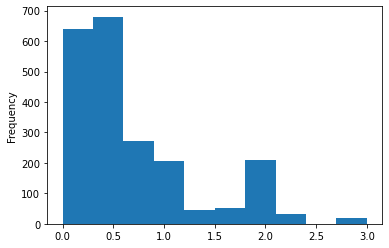

In [32]:
df.VA.plot.hist()

<AxesSubplot:ylabel='continue injection'>

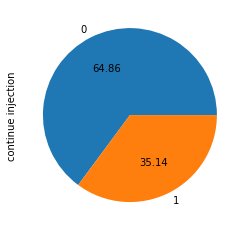

In [41]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df['continue injection'].value_counts().plot.pie(autopct=autopct)

<AxesSubplot:ylabel='IRF'>

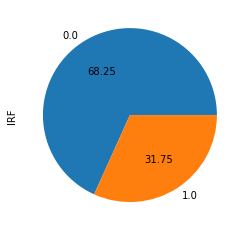

In [42]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df.IRF.value_counts().plot.pie(autopct=autopct)

<AxesSubplot:ylabel='SRF'>

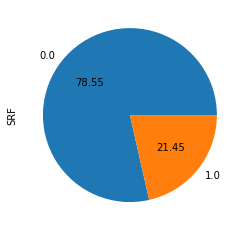

In [43]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df.SRF.value_counts().plot.pie(autopct=autopct)

<AxesSubplot:ylabel='HRF'>

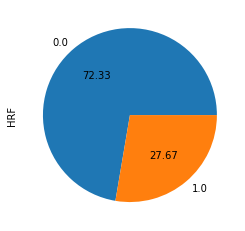

In [44]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df.HRF.value_counts().plot.pie(autopct=autopct)

The data on each label are unbalanced. Need to define which to remove, which to upsampling and downsampling.